# 70 Dog Breeds Neural Net

**NN**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Rescaling
from keras.preprocessing.image import ImageDataGenerator

In [596]:
bSize = 100
lRate = 0.01
Epochs = 50

In [597]:
data_all = pd.read_csv('dogs.csv')
data_all['labels'] = data_all['labels'].replace(['American  Spaniel'], 'American Spaniel')
breeds = data_all['labels'].unique()
Classes = []
for i in breeds:
    Classes.append(i)

In [598]:
# reference for this ImageDataGenerator image labeling and feeding method:
# https://towardsdatascience.com/a-single-function-to-streamline-image-classification-with-keras-bd04f5cfe6df
# it is a built in function in Keras
train_Gen = ImageDataGenerator(rescale = 1. / 255)
train_genX = train_Gen.flow_from_directory(
    'train',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 7946 images belonging to 70 classes.


In [599]:
test_Gen = ImageDataGenerator(rescale = 1. / 255)
test_genX = test_Gen.flow_from_directory(
    'test',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 700 images belonging to 70 classes.


In [600]:
val_Gen = ImageDataGenerator(rescale = 1. / 255)
val_genX = val_Gen.flow_from_directory(
    'valid',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 690 images belonging to 70 classes.


In [601]:
cnnModel = Sequential()

cnnModel.add(Rescaling((1. / 1), input_shape = (224, 224, 3)))
cnnModel.add(MaxPooling2D((2, 2)))
cnnModel.add(Conv2D(128, 4, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((3, 3)))
cnnModel.add(Conv2D(128, 4, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((3, 3)))
cnnModel.add(Conv2D(256, 4, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((3, 3)))
cnnModel.add(Conv2D(512, 4, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((3, 3)))
#cnnModel.add(Conv2D(256, 5, padding = 'same', activation = 'relu'))
#cnnModel.add(MaxPooling2D((3, 3)))
cnnModel.add(Flatten())

cnnModel.add(Dense(512, activation='relu'))

cnnModel.add(Dense(70, activation='softmax'))

In [604]:

cnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [605]:
history = cnnModel.fit(
    train_genX,
    validation_data = val_genX,
    batch_size = 100,
    epochs = Epochs
)

Epoch 1/50
80/80 [==============================] - 56s 676ms/step - loss: 0.1052 - accuracy: 0.0165 - val_loss: 0.0764 - val_accuracy: 0.0145
Epoch 2/50
80/80 [==============================] - 33s 416ms/step - loss: 0.0755 - accuracy: 0.0194 - val_loss: 0.0759 - val_accuracy: 0.0130
Epoch 3/50
80/80 [==============================] - 33s 412ms/step - loss: 0.0738 - accuracy: 0.0269 - val_loss: 0.0726 - val_accuracy: 0.0319
Epoch 4/50
80/80 [==============================] - 33s 413ms/step - loss: 0.0718 - accuracy: 0.0398 - val_loss: 0.0710 - val_accuracy: 0.0435
Epoch 5/50
80/80 [==============================] - 34s 422ms/step - loss: 0.0703 - accuracy: 0.0485 - val_loss: 0.0691 - val_accuracy: 0.0565
Epoch 6/50
80/80 [==============================] - 34s 420ms/step - loss: 0.0684 - accuracy: 0.0730 - val_loss: 0.0679 - val_accuracy: 0.0899
Epoch 7/50
80/80 [==============================] - 34s 423ms/step - loss: 0.0659 - accuracy: 0.1022 - val_loss: 0.0662 - val_accuracy: 0.0899

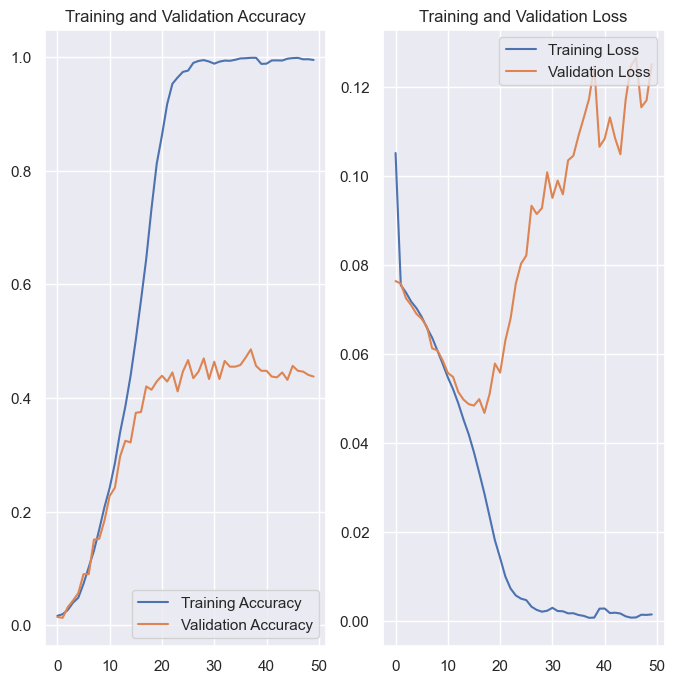

In [606]:
#https://www.tensorflow.org/tutorials/images/classification

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()